In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import rc


In [2]:
M = 100 # number of rows
N = 80  # number of columns 

x = np.arange(0,N)  # horizontal grid 
y = np.arange(0,M)  # vertical grid 
xx, yy = np.meshgrid(x, y)

## Linearity of 2D-DFT
DFT($z_1+z_2$)=DFT($z_1$)+DFT($z_2$)

In [3]:
# create z_1
v1 = 12/N
u1 = 20/M
z1 = np.sin(2*np.pi*(xx*v1 + yy*u1)) 
z1_hat = np.fft.fft2(z1) # calculate the 2D DFT in numpy

# create z_2
v2 = -4/N
u2 = 5/M
z2 = np.sin(2*np.pi*(xx*v2 + yy*u2)) 
z2_hat = np.fft.fft2(z2) # calculate the 2D DFT in numpy

# create signal as sum z=z_1+z_2
z = z1 + z2
z_hat = np.fft.fft2(z) # calculate the 2D DFT in numpy

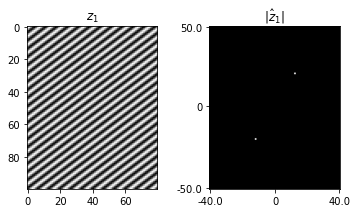

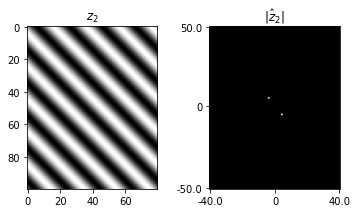

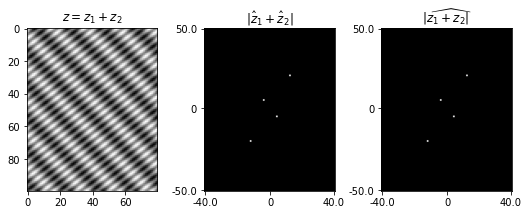

In [4]:
fig = plt.figure(figsize =(6,3))
plt.subplot(1, 2, 1)
plt.imshow(z1,cmap='gray', aspect='equal')
plt.title('$z_1$')
plt.subplot(1, 2, 2)
plt.imshow((np.fft.fftshift(abs(z1_hat))),cmap='gray', aspect='equal',origin='lower')  # don't forget to fftshift
#  For two-dimensional input, swaps first and third quadrants, and second and fourth quadrants.
plt.xticks(ticks=[0,N/2, N-1], labels=[-N/2,0,N/2]) 
plt.yticks(ticks=[0,M/2, M-1], labels=[-M/2,0,M/2]) 
plt.title('$|\hat{z}_1|$')

fig = plt.figure(figsize =(6,3))
plt.subplot(1, 2, 1)
plt.imshow(z2,cmap='gray', aspect='equal')
plt.title('$z_2$')
plt.subplot(1, 2, 2)
plt.imshow((np.fft.fftshift(abs(z2_hat))),cmap='gray', aspect='equal',origin='lower')  # don't forget to fftshift
#  For two-dimensional input, swaps first and third quadrants, and second and fourth quadrants.
plt.xticks(ticks=[0,N/2, N-1], labels=[-N/2,0,N/2]) 
plt.yticks(ticks=[0,M/2, M-1], labels=[-M/2,0,M/2]) 
plt.title('$|\hat{z}_2|$')

fig = plt.figure(figsize =(9,3))
plt.subplot(1, 3, 1)
plt.imshow(z,cmap='gray', aspect='equal')
plt.title('$z=z_1+z_2$')
plt.subplot(1, 3, 2)
plt.imshow((np.fft.fftshift(abs(z1_hat + z2_hat))),cmap='gray', aspect='equal',origin='lower')  # don't forget to fftshift
#  For two-dimensional input, swaps first and third quadrants, and second and fourth quadrants.
plt.xticks(ticks=[0,N/2, N-1], labels=[-N/2,0,N/2]) 
plt.yticks(ticks=[0,M/2, M-1], labels=[-M/2,0,M/2])
plt.title('$|\hat{z}_1+\hat{z}_2|$')
plt.subplot(1, 3, 3)
plt.imshow((np.fft.fftshift(abs(z_hat))),cmap='gray', aspect='equal',origin='lower')  # don't forget to fftshift
#  For two-dimensional input, swaps first and third quadrants, and second and fourth quadrants.
plt.xticks(ticks=[0,N/2, N-1], labels=[-N/2,0,N/2]) 
plt.yticks(ticks=[0,M/2, M-1], labels=[-M/2,0,M/2]) 
plt.title('$|\widehat{z_1+z_2}|$')
plt.show()

## Define helper functions for plotting



In [5]:
def imshow_f_dft_pair(z,z_hat,cm='jet'):
    fig = plt.figure(figsize =(8,4))
    plt.subplot(1, 2, 1)
    plt.imshow(z,cmap='gray', aspect='equal')
    plt.title('z')
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.imshow((np.fft.fftshift(abs(z_hat))),cmap=cm, aspect='equal',origin='lower')  # don't forget to fftshift
    #  For two-dimensional input, swaps first and third quadrants, and second and fourth quadrants.
    plt.xticks(ticks=[0,N/2, N-1], labels=[-N/2,0,N/2]) 
    plt.yticks(ticks=[0,M/2, M-1], labels=[-M/2,0,M/2]) 
    plt.colorbar()
    plt.title('$|\hat{z}|$')
    plt.show()

In [6]:
 def surf_f_dft_pair(z,z_hat):  # plotting log of DFT
    fig = plt.figure(figsize =(8,4))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(xx,yy,z,cmap='gray')
    ax.set_title('z')
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(xx,yy,np.log(np.fft.fftshift(abs(z_hat))),cmap='jet')  # don't forget to fftshift
    #  For two-dimensional input, swaps first and third quadrants, and second and fourth quadrants.
    ax2.set_title('$log|\hat{z}|$')
    plt.show()

## Common image-DFT pairs

FFT of a unit impulse function is a constant function.  
$\delta[m,n] \rightarrow 1 $     (using python fft2 normalization)

In [7]:
z = np.zeros((M,N))
z[0,0]=1
z_hat = np.fft.fft2(z) # calculate the 2D DFT in numpy

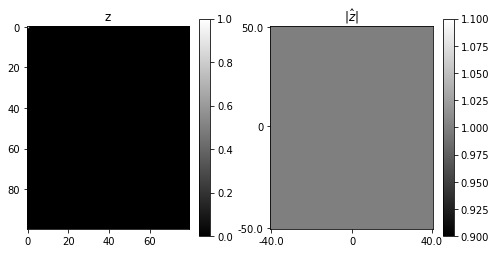

In [8]:
imshow_f_dft_pair(z,z_hat,cm='gray')

FFT of a constant function is a unit impulse function.  
$1 \rightarrow MN \delta[u,v]  $     (using python fft2 normalization)

In [9]:
z = np.ones((M,N))
z_hat = np.fft.fft2(z) # calculate the 2D DFT in numpy

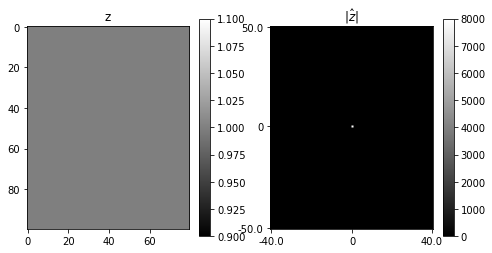

In [10]:
imshow_f_dft_pair(z,z_hat,cm='gray')   # note amplitude of impulse in fourier domain

FFT of a 1D rectangular function is a sinc function.  
In 2D, FFT of a 2D rectangular function is a 2D sinc function

In [11]:
z = np.zeros((M,N))
z[np.logical_and(np.abs(yy-M/2)<7,np.abs(xx-N/2)<9)]=1

In [12]:
z_hat = np.fft.fft2(z) # calculate the 2D DFT in numpy

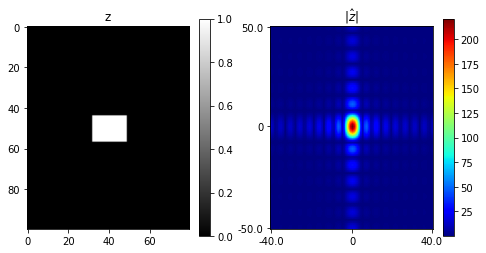

In [13]:
imshow_f_dft_pair(z,z_hat)

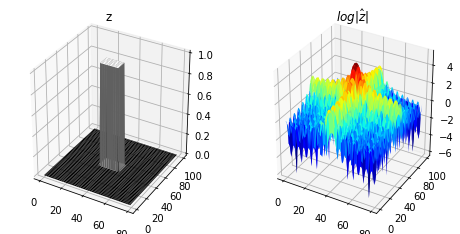

In [14]:
surf_f_dft_pair(z,z_hat)

This can also be generalized to a circle

In [15]:
z = np.zeros((M,N))
z[((yy-M/2)**2+(xx-N/2)**2)<40]=1
z_hat = np.fft.fft2(z) # calculate the 2D DFT in numpy

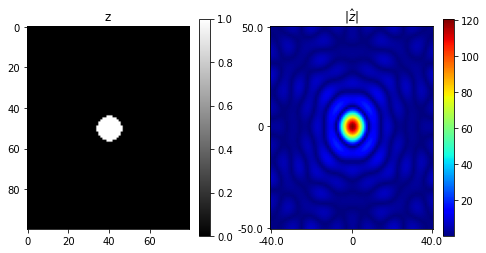

In [16]:
imshow_f_dft_pair(z,z_hat)

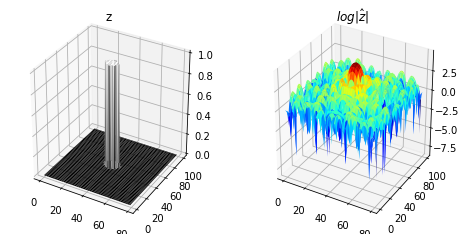

In [17]:
surf_f_dft_pair(z,z_hat)

FFT of a Gaussian is a Gaussian with inverse scaling

$$z[m,n] = \exp\left(-2\pi^2 \sigma^2 \left(\left(m-\frac{M}{2}\right)^2+\left(n-\frac{N}{2}\right)^2\right)\right)$$

In [18]:
sigma = 0.02
z = np.zeros((M,N))
z = np.exp(-2*sigma**2*np.pi**2*((yy-M/2)**2+(xx-N/2)**2))
z_hat = np.fft.fft2(z) # calculate the 2D DFT in numpy

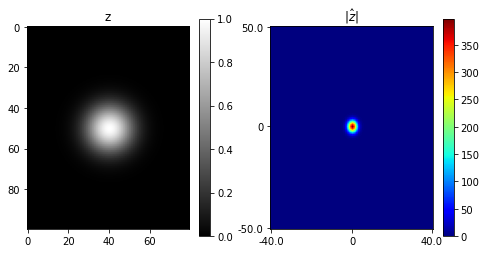

In [19]:
imshow_f_dft_pair(z,z_hat)

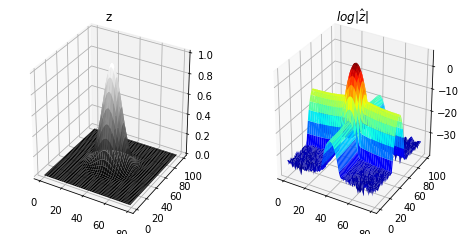

In [20]:
surf_f_dft_pair(z,z_hat)

In [21]:
sigma = 0.1 # increase variance of the Gaussian
z = np.zeros((M,N))
z = np.exp(-2*sigma**2*np.pi**2*((yy-M/2)**2+(xx-N/2)**2))
z_hat = np.fft.fft2(z) # calculate the 2D DFT in numpy

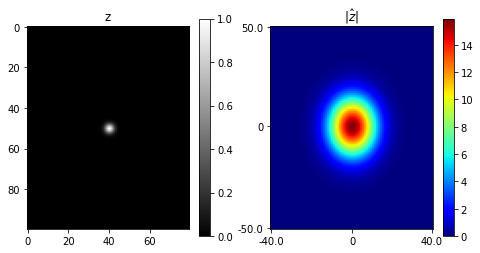

In [22]:
imshow_f_dft_pair(z,z_hat)

## Translation and Modulation
Translation in image space becomes modulation in the frequency domain  
$z[m-m_0,n-n_0] \rightarrow \hat{z}[u,v]\exp(-2\pi i (um_0/M+ vn_0/N))$

In [23]:
sigma = 0.1
z = np.zeros((M,N))
z = np.exp(-2*sigma**2*np.pi**2*((yy-M/2-10)**2+(xx-N/2-15)**2))
z_hat = np.fft.fft2(z) # calculate the 2D DFT in numpy

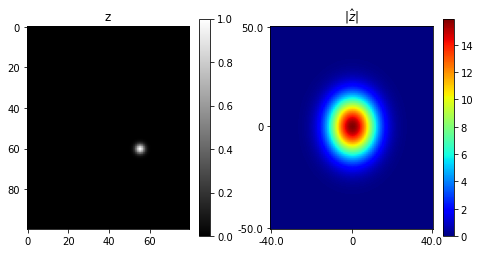

In [24]:
imshow_f_dft_pair(z,z_hat)

Modulation in image space becomes translation in the frequency domain  
$z[m,n]\exp(-2\pi i(mu_0/M+ nv_0/N)) \rightarrow \hat{z}[u-u_0,v-v_0]$

In [25]:
z = np.zeros((M,N))
z[np.logical_and(np.abs(yy-M/2)<7,np.abs(xx-N/2)<9)]=1

u0 = -10 / M
v0 = -15 / N

z_mod = z*np.exp(1j *2 * np.pi * (v0*xx + u0*yy) )
z_hat = np.fft.fft2(z_mod) # calculate the 2D DFT in numpy

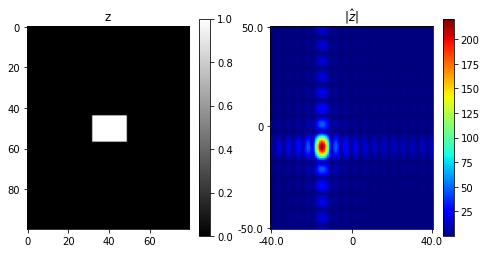

In [26]:
imshow_f_dft_pair(abs(z_mod),z_hat)